### Red Wine Quality Prediction

##### Problem Statement:

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

##### Attribute Information

Input variables (based on physicochemical tests):
1. - fixed acidity
2. - volatile acidity
3. - citric acid
4. - residual sugar
5. - chlorides
6. - free sulfur dioxide
7. - total sulfur dioxide
8. - density
9. - pH
10. - sulphates
11. - alcohol
Output variable (based on sensory data):
12. - quality (score between 0 and 10)

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

You need to build a classification model. 

Inspiration

Use machine learning to determine which physiochemical properties make a wine 'good'!




In [1]:
# Importing Necessory Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Models:
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

#Matrics for evaluation:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_roc_curve,roc_auc_score


In [124]:
#Reading the dataset:
data=pd.read_csv('winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


As we can see this is a dataset of Red Wine Quality prediction. It contains 11 different types of independent variables (fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol) and on the basis of those variables we need to predict the wine quality(category) and there is 8 different types or category of wine is listed as dependent variable(target). So this is a multiclass classification. But the problem statement has already stated that we need to divide those 8 types of categories into only 2 categories(Good and Bad),so we need to convert this classification problem into Binary Classification. And other thing we can see by reading the dataset is that all the independent variables are float type of (continuous data) and the target variable is integer type of data.

In [3]:
data.shape

(1599, 12)

The dataset contains 1599 rows and 12 columns.

In [4]:
data.info

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067

All the features are having float type of data and only the target variable (Quality) is having integer type of data.

In [5]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

All the features are having float type of data and only the target variable (Quality) is having integer type of data.

In [6]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

This dataset contains 11 different types of independent variables (fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol) and one target variable (quality).

In [7]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

The dataset doesn't contain any missing value.


###### Statistics of the dataset:

In [8]:
# Checking the statistics of the dataset:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


We can see as the count of each value is 1599,so there is no missing value present in the dataset. Some of the independent variables(density and pH) are somewhat symmetrically or normally distributed as mean and median close to each other but other than those data is more or less skewed.

1. As we can see min value of citric acid is showing 0.000000, may be it's not possible, 
2. the difference between quantile2 and quantile3 is very low in residual sugar where as difference of max of residual sugar with its quantile 3 is very high, so there is skewness in the data, 
3. In free sulfur dioxide column we can see the difference of max and quantile3 is very high, so presence of skewness is possible.

Let's check the skewness inthe dataset:

In [9]:
data.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

So, we can see there is more or less skewness inthe dataset. Now we need to Visualize those:

Let's do analyze the different columns:

##### Univariate Analysis:

In [10]:
# Checking the Lable column to understand the dataset is balanced or not.

data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

As we can see there are 6 different qualities of Wine are present in the target column. Where, each category is not balanced, Category 5 is having 681 wine samples, category 6 is having 638 wine samples, category 7 is having 199 wine samples, category 4 is having 53 wine samples, category 8 is having 18 wine samples and category 3 is having 10 wine samples.
Let's visualize those categories:

<AxesSubplot:xlabel='quality', ylabel='count'>

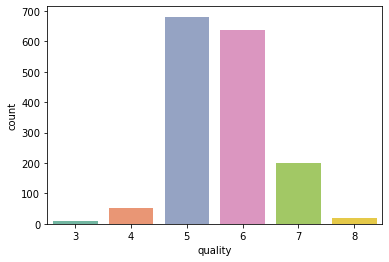

In [11]:
sns.countplot(data['quality'],palette='Set2')

As we can see 6 different categories are having 6 different numbers of wine samples, by this visualization it's easy to understand that.

As this is a Wine quality dataset, we should visualize the Alcohol Content of the Wine samples as Alcohol is a very important feature to understand wine quality.

Text(0.5, 1.0, 'Alcohol Content')

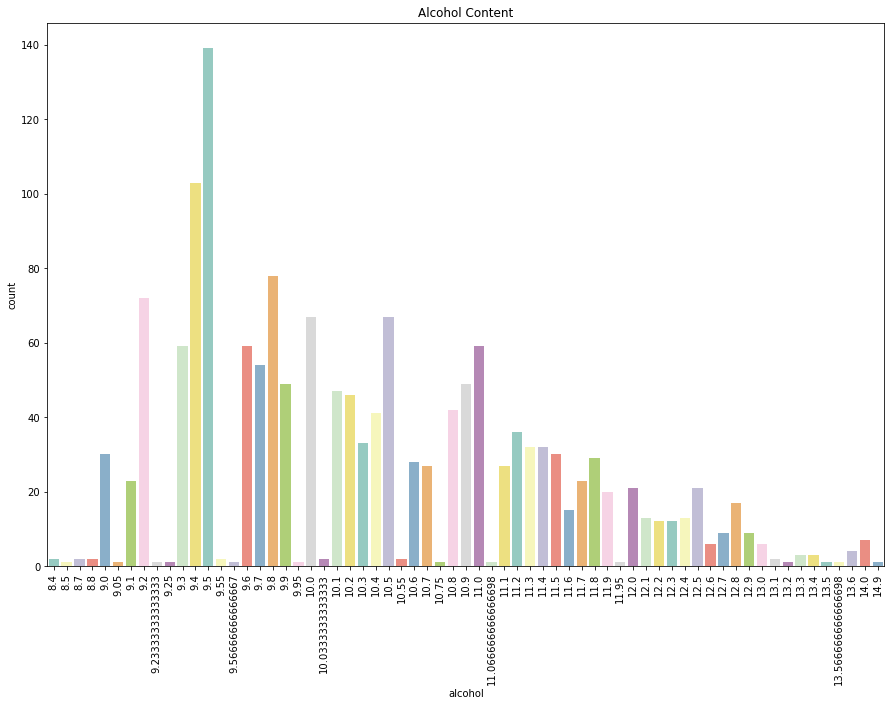

In [12]:
plt.figure(figsize=(15,10))
sns.countplot(data['alcohol'],palette='Set3')
plt.xticks(rotation=90)
plt.title('Alcohol Content')

As we can see, the alcohol content is ranging from 8.4-14.9, though 9.4 and 9.5 are more common if we consider the number of wine samples. 

Now it's time to see the Distribution of the feature data.
Let's instantiate the continuous independent variables into a object called data_features and target variable into a object i.e target.

In [13]:
data_features=data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
target=data['quality']

Now let's see the distribution:

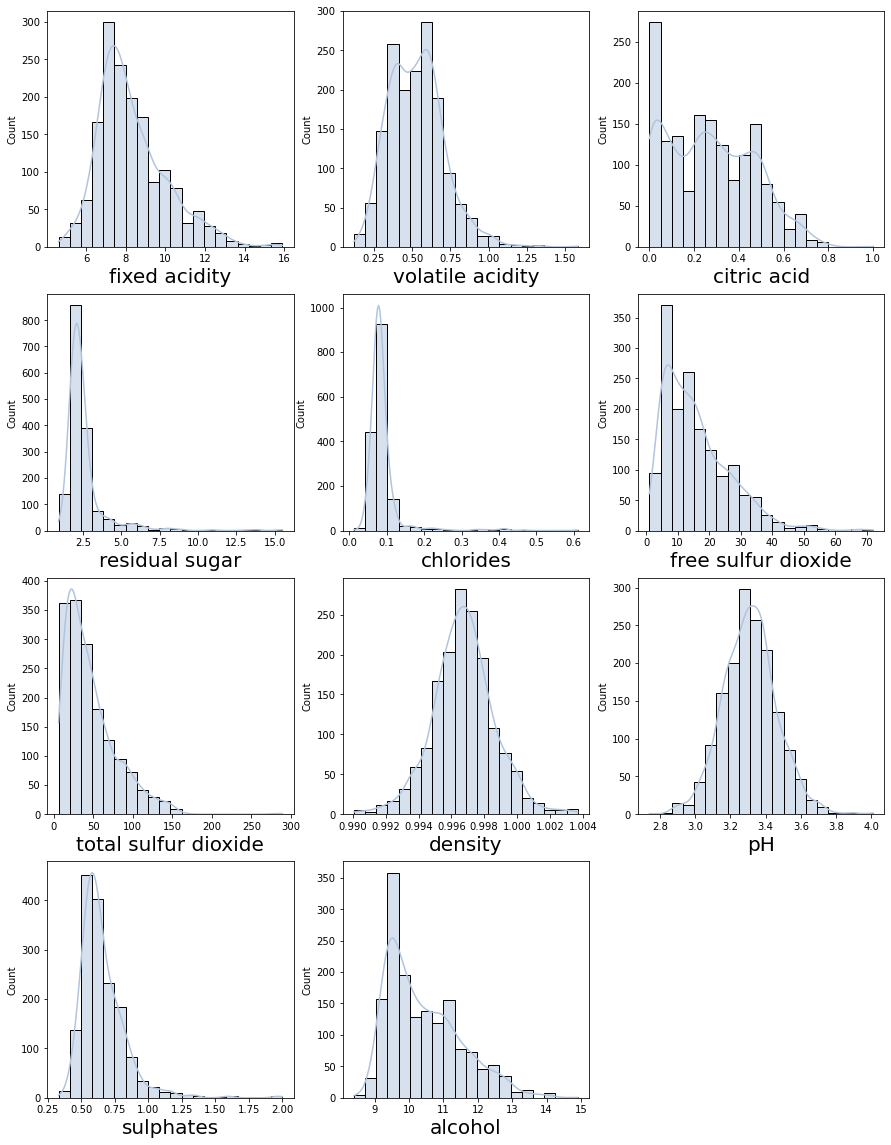

In [14]:
plt.figure(figsize=(15,20),facecolor='white')
plotnumber=1
for column in data_features:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.histplot(data_features[column],kde=True,bins=20,color='lightsteelblue')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

As we can see there are more or less skewness in every Independent variables. Fixed acidity','volatile acidity', 'citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','sulphates' and 'alcohol' columns are having right skewness. So, after all the analysis we will try to reduce the skewness.


Now it's time to check the relations between independent variables with target.
Let's check it out:

##### Bivariate Analysis and Multivariate Analysis:

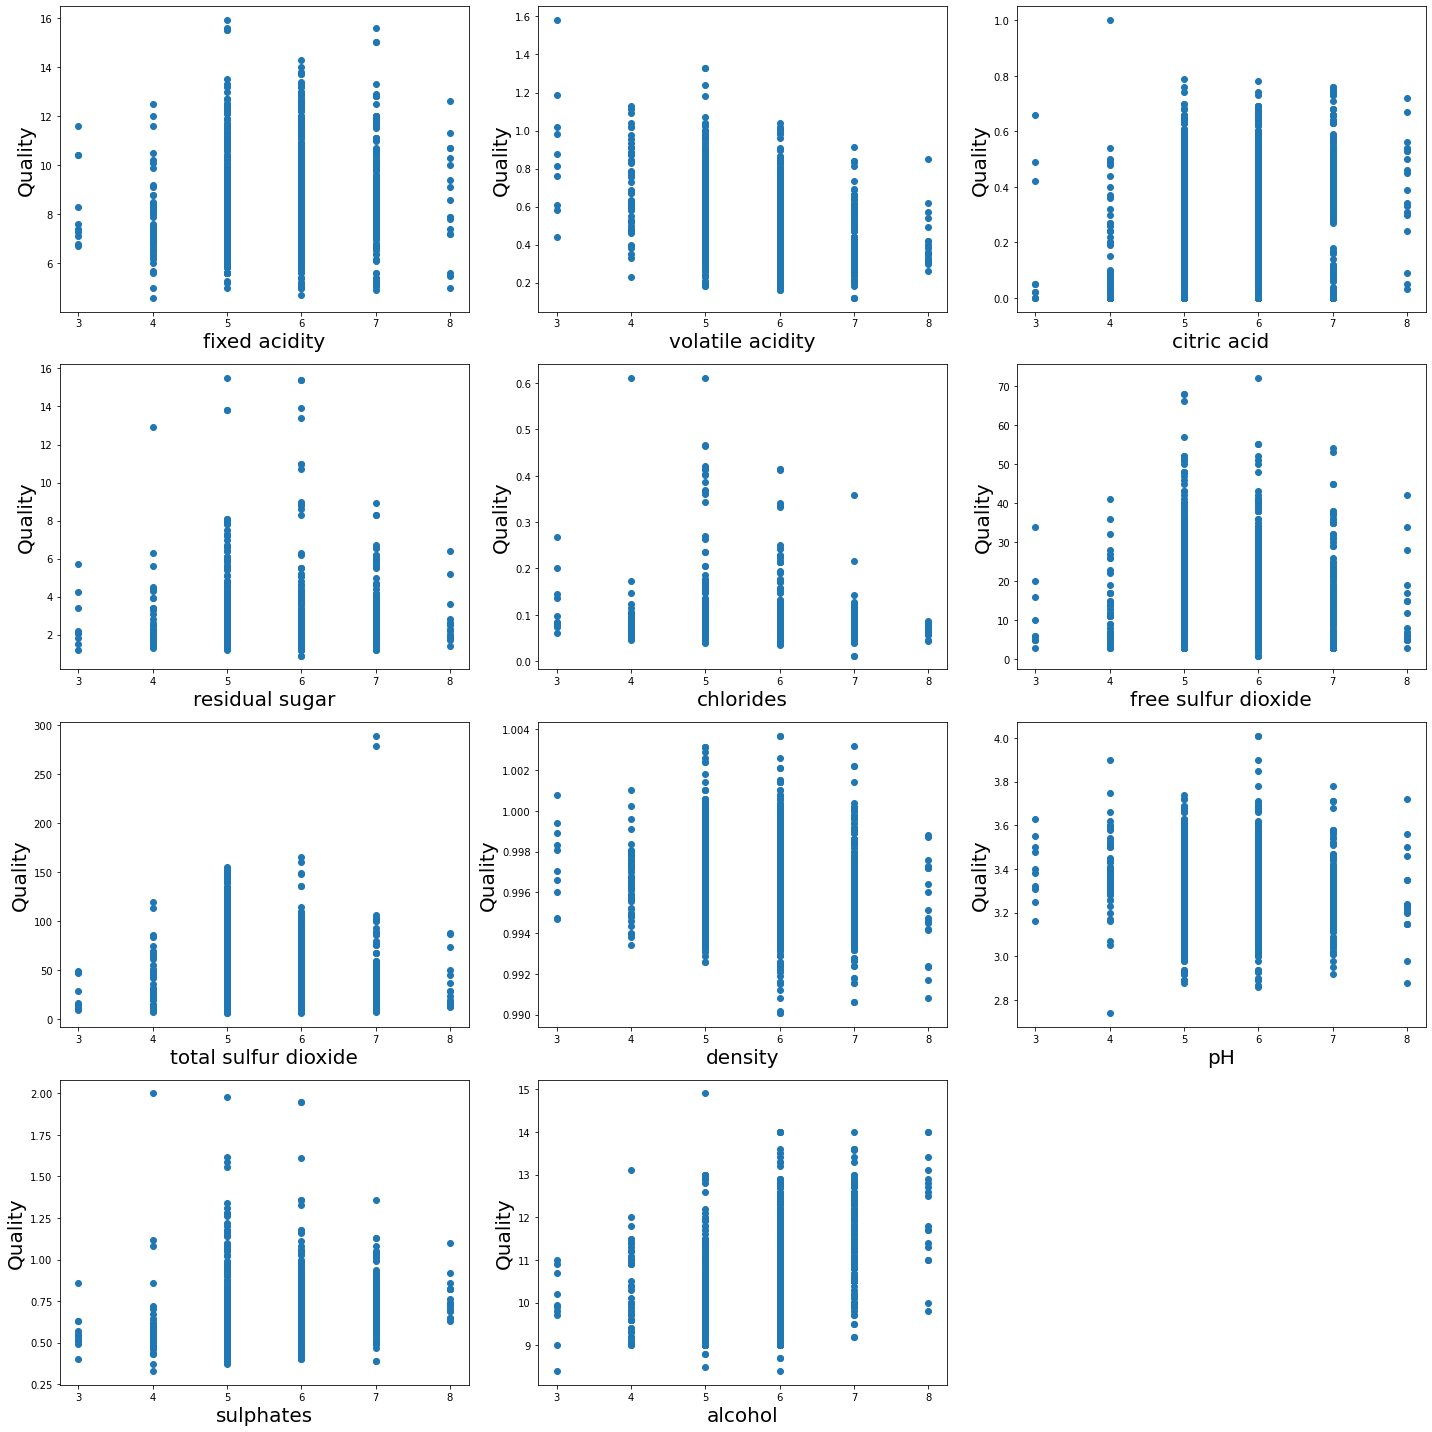

In [15]:
#to check the relationship between differnt features vs target variable by using scatter plot
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for column in data_features:
    if plotnumber<=12:
        ax= plt.subplot(4,3,plotnumber)
        plt.scatter(target,data_features[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Quality',fontsize=20)
    plotnumber +=1    
plt.tight_layout()

As we can see by analyzing the relations,
1. Better quality wine is having less fixed acidity,
2. Better quality wine is having less volatile acidity,
3. better quality wine is containing more citric acid,
4. Better quality wine contains less residual sugar,
5. Better quality wine is containing less chlorides,
6. better quality wine is having less free sulfur dioxide,
7. better quality wine is having less total sulfur dioxide but there is outliers also,
8. better qulity wine is having less density,
9. better the quality of wine lesser the pH,
10. better the wine quality lesser the sulphates,
11. better the wine quality more the alcohol content.
But we need to check these relations more to conclude anything.

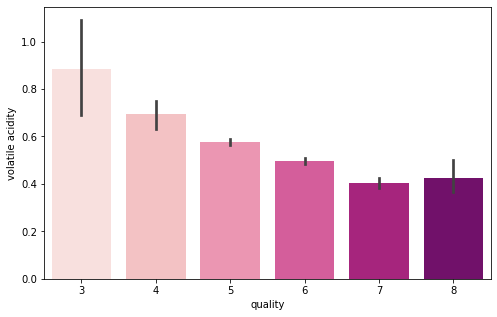

In [16]:
plt.figure(figsize=(8,5))
sns.barplot(data['quality'],data['volatile acidity'],palette="RdPu")
plt.show()

As we can see wine quality decreases with increasing volatile acidity.

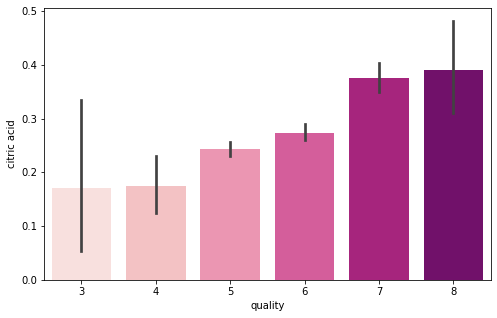

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(data['quality'],data['citric acid'],palette="RdPu")
plt.show()

More citric acid better quality wine, but outlier is present.

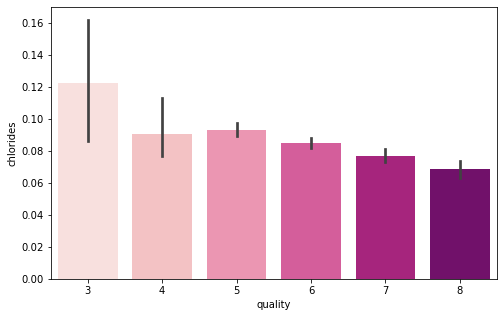

In [18]:
plt.figure(figsize=(8,5))
sns.barplot(data['quality'],data['chlorides'],palette="RdPu")
plt.show()

After seeing the relation between quality of wine and chlorides we can say wine quality decreases with increasing chlorides in wine.

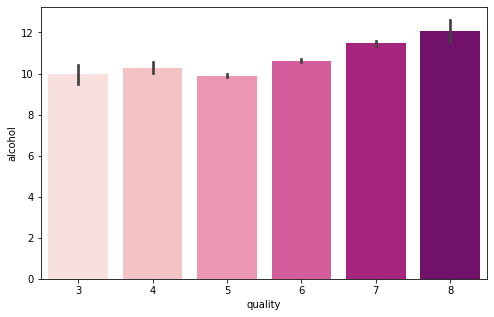

In [19]:
plt.figure(figsize=(8,5))
sns.barplot(data['quality'],data['alcohol'],palette="RdPu")
plt.show()

As we can see,wine quality increases by increasing alcohol content.

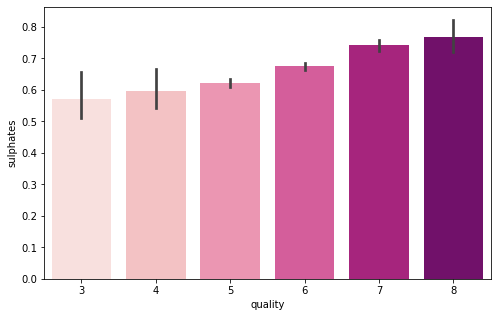

In [20]:
plt.figure(figsize=(8,5))
sns.barplot(data['quality'],data['sulphates'],palette="RdPu")
plt.show()

As we can see in the graph the more sulphates ,more better quality wine.

#### As the problem statement already stated us to arbitrary cutoff dependent variable (wine quality) into Good Quality and Bad Quality,we dividing the 'quality' 7 or higher classified as 'good/1' and the remainder as 'Bad/0'. Like that we can making binary classificaion for the response variable.

In [21]:
bins=(2, 6.5, 8)
group_names=['bad', 'good']
data['quality']=pd.cut(data['quality'], bins=bins, labels =group_names)

In [22]:
#Now lets assign labels to our target variable:
l_quality = LabelEncoder()

In [23]:
#Now Bad is 0 and good is 1 :
data['quality'] = l_quality.fit_transform(data['quality'])

In [24]:
data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

##### We have divided the the target variable into only two categories, as the problem statement states.

Let's Visualize the 2 categories:

<AxesSubplot:xlabel='quality', ylabel='count'>

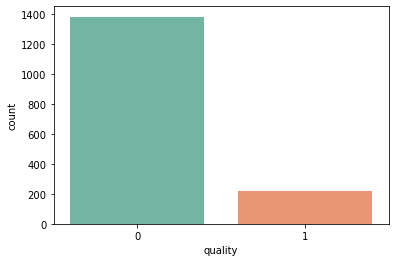

In [25]:
sns.countplot(data['quality'],palette='Set2')

But the target is imbalanced as 'Bad'(0) category is having more data(1382) and 'Good'(1) is having less data. So, we will balance the target before training the models. 

##### Outlier Detection:
Outliers are the values which differ significantly with the objects. For making a good model we need to remove those outliers. Let's first detect those. We are using boxplot to detect the outliers in the dataset.

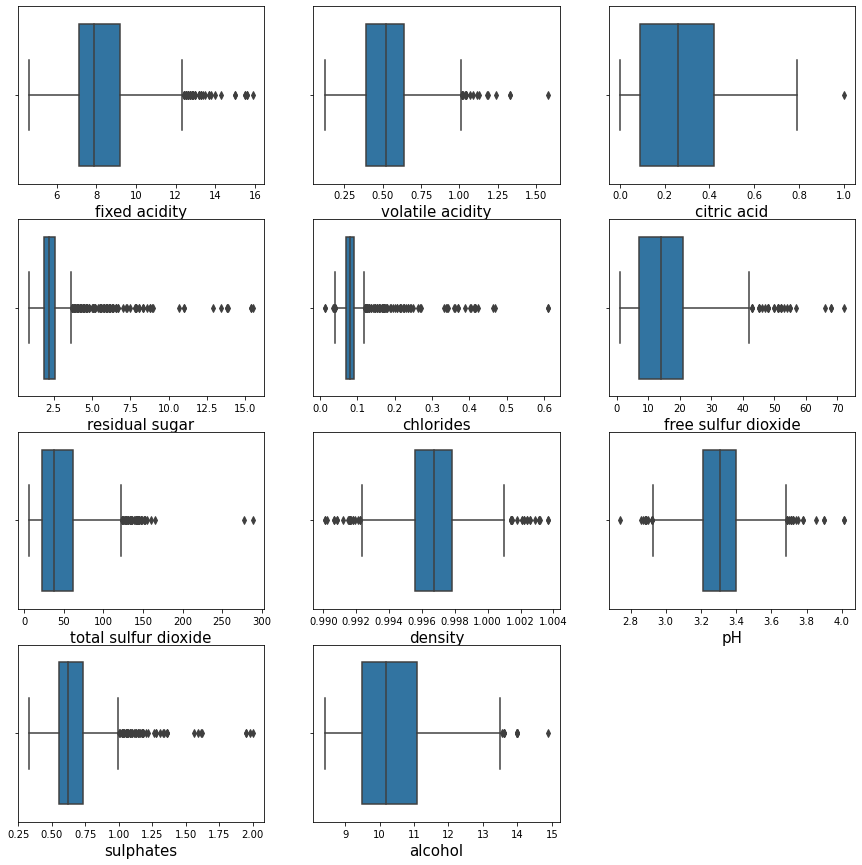

In [26]:
plt.figure(figsize=(15,15),facecolor='white')
plotnumber=1
for column in data_features:
    if plotnumber<=11:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(data_features[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

As we can see more or less each and every feature is having outliers. Some features are having outliers in both ends. Some are having in higher side and some features are having in lower side. but no feature is without outlier.

For making a good model we need to check the correlation between features and correlations of features vs target variable.

##### Plotting heatmap (correlation matrix)
Let's try to see if we can reduce the features using different techniques. Let's plot Heatmap to visualize and find the coefficient and multicolinearity.

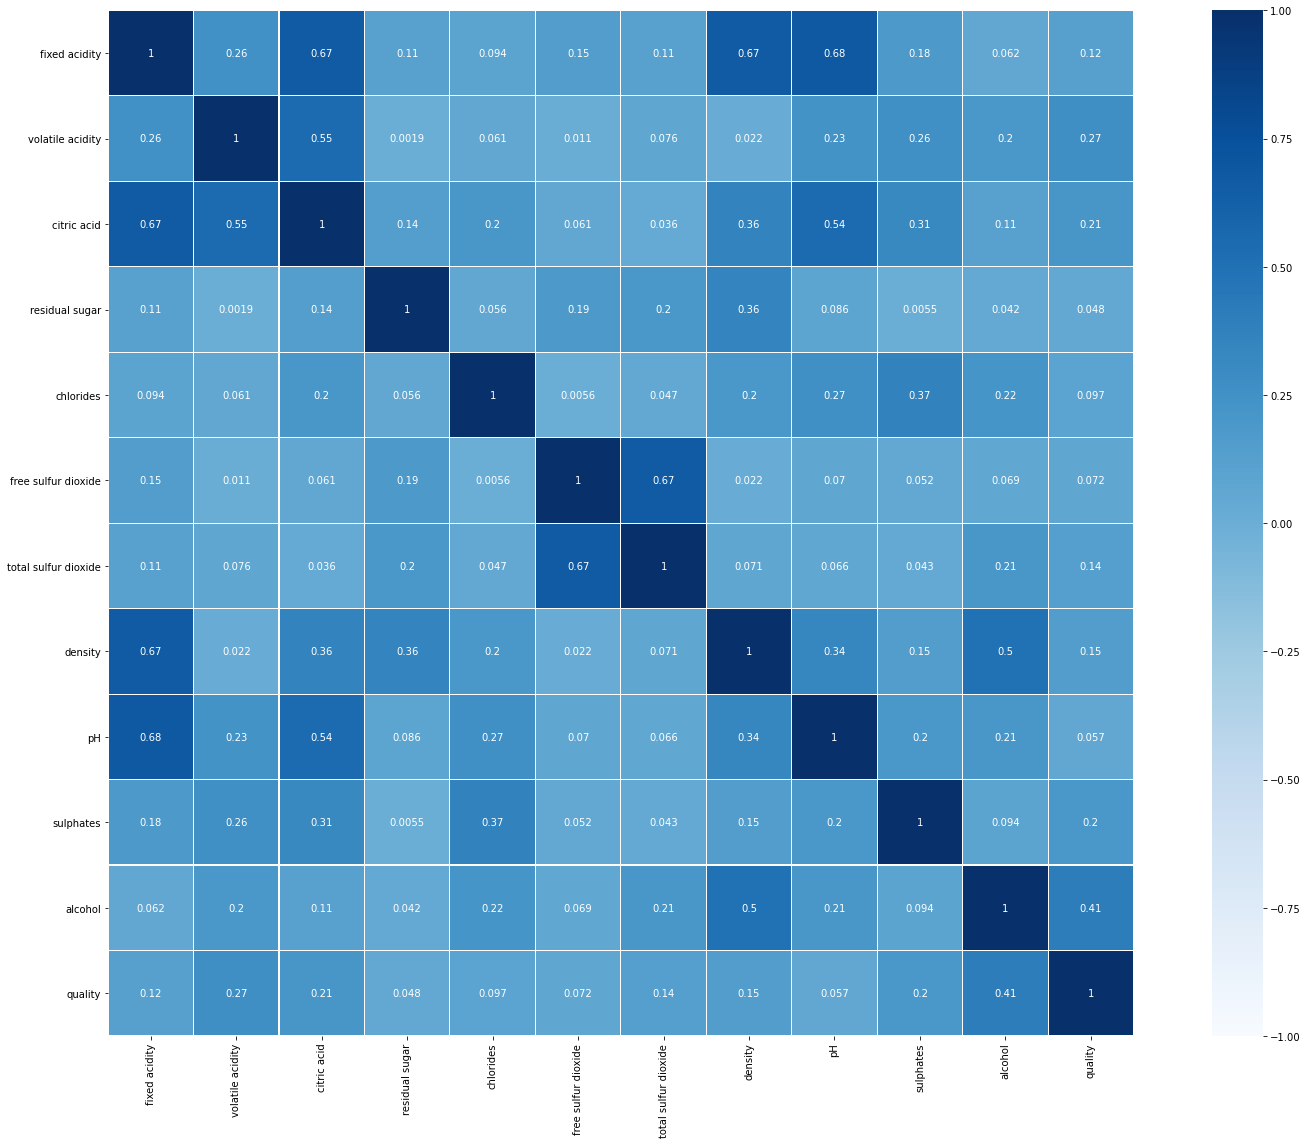

In [27]:
data_corr=data.corr().abs()

plt.figure(figsize=(22,16))
sns.heatmap(data_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,cmap='Blues',
            linewidths=.1)
plt.tight_layout()

Least correlation between features important for Classification. But in this dataset, Free sulfur dioxide and total sulfer dioxide has correlation(0.67), pH with citric acid has correlation(0.54),fixed acidity and citric acid has correlation(0.67),volatile acidity and citric acid has correlation(0.55). On the other hand Alcohol has a good relation with quality.

##### Outlier Removal:
Now by using Z-Score we will eliminate skewness from continous data. By appling Z-score we are going to convert the dataset into Standard Normal distribution. Let's clean the skewness:

In [29]:
from scipy.stats import zscore

In [30]:
z_score = zscore(data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]) #converting data into standard normal distribution
abs_z_score=np.abs(z_score)

filtering_entry=(abs_z_score<3).all(axis=1)

data=data[filtering_entry]
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,8.312551,0.524050,0.265281,2.388717,0.081531,15.089849,43.660494,0.996718,3.316152,0.642414,10.417798,0.137860
std,1.647635,0.169451,0.191271,0.865307,0.021218,9.317669,29.414615,0.001718,0.141052,0.129753,1.021649,0.344871
min,5.000000,0.120000,0.000000,1.200000,0.038000,1.000000,6.000000,0.991500,2.880000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995600,3.220000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,36.000000,0.996700,3.315000,0.620000,10.200000,0.000000
75%,9.200000,0.635000,0.420000,2.600000,0.089000,21.000000,58.000000,0.997800,3.400000,0.720000,11.100000,0.000000
max,13.500000,1.040000,0.790000,6.700000,0.226000,47.000000,145.000000,1.002200,3.750000,1.160000,13.600000,1.000000


As we can see Z-score eliminate some deviated data. Now we need to check how much data we have lost after eliminate outliers.

In [31]:
data.shape

(1458, 12)

Before applying z-score we had 1599 data, now we have 1458 data. As we have lost less than 9% data we are good to go.


Now it's time to check if the skewness is gone or not.

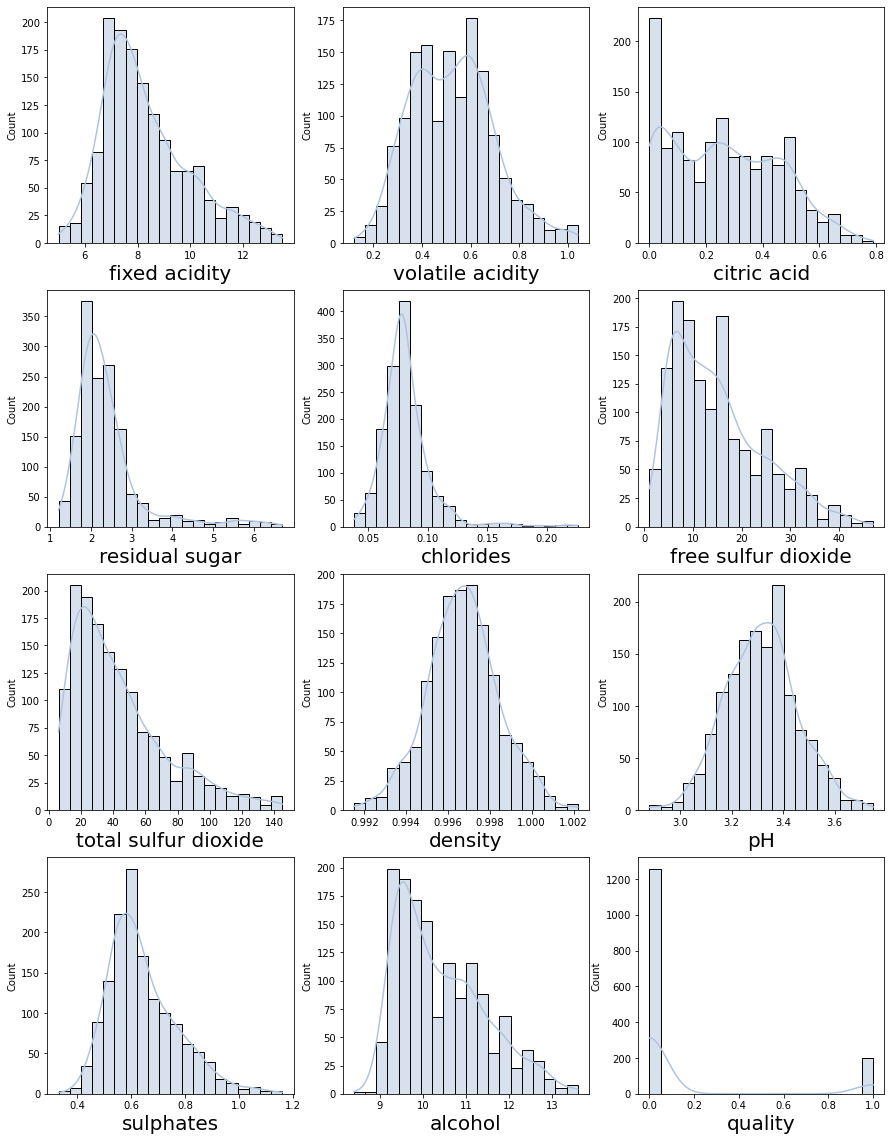

In [32]:
plt.figure(figsize=(15,20),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.histplot(data[column],kde=True,bins=20,color='lightsteelblue')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

As we can see some features are normally distributed after eleminating the skewness but some of them are still having them. But we can't loose more data to make these features normally distributed.

In [132]:
#### dividing the feature and label for further operations:
y = data['quality']
x = data.drop(columns=['quality'])
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


we have divided the features and the target data for future processes. 
##### Now lets check the Variance Inflation factor:

In [133]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,8.870110,fixed acidity
1,2.125599,volatile acidity
2,3.955102,citric acid
3,1.776090,residual sugar
4,1.280588,chlorides
5,1.897762,free sulfur dioxide
6,2.103150,total sulfur dioxide
7,7.903388,density
8,3.576601,pH
9,1.439984,sulphates


As we can see there is multicolinearity problem in fixed acidity, and density but we are not going to drop any feature as this dataset contains only 11 features. We cannot afford to loose any feature.

Now it's time to balance the target variable. Let's do it using SMOTE. And we are going to upscale the good quality category as it is very less.

In [81]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y = sm.fit_resample(x,y)

In [82]:
y.value_counts()

1    1257
0    1257
Name: quality, dtype: int64

Now we can see the Good quality category is already upscaled.

Now it's time to Standardize the features before model creation as all of them are in different scales.

##### standardization:

In [83]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000
...,...,...,...,...,...,...,...,...,...,...,...
2509,7.708214,0.282875,0.306571,2.065709,0.062657,17.876795,34.123205,0.995286,3.282875,0.898357,11.361602
2510,10.180607,0.514590,0.380598,2.744041,0.092604,9.619393,44.619393,0.999092,3.218432,0.616493,9.738061
2511,10.480005,0.503502,0.633002,2.400000,0.106850,6.000000,14.900027,0.997257,3.096498,0.659500,11.790003
2512,8.112080,0.390403,0.429597,4.593020,0.076432,24.608054,42.783893,0.995316,3.302711,0.801356,11.972886


Data has standardized!


##### Hold Out Method:

Model will be built on Hold Out method(75/25 training and test split)to gauge how well the classifier is working.


In [84]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=21)

#### Model Creation:
We are going to build 5 different models. Those are,

1. Decision Tree Classifier 
2. Random Forest Classifier
3. K-Neighbors Classifier
4. Support Vector Classifier
5. Gradient Boosting Classifier

Now let's see how good are the models going to work:

##### 1. Decision Tree Classifier :

In [85]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_train)
dt_clf_report = pd.DataFrame(classification_report(y_train,dt_pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,dt_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{dt_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,dt_pred)}\n")
      


=======================Train Result===========================
Accuracy score:100.00%
_______________________________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    953.0  932.0       1.0     1885.0        1885.0
________________________________________________________________
 Confusion Matrix:
[[953   0]
 [  0 932]]



In [86]:
dt_pred=dt.predict(x_test)
dt_clf_report = pd.DataFrame(classification_report(y_test,dt_pred,output_dict=True))
print("\n=======================Test Result of dt_clf===========================")
print(f"Accuracy score:{accuracy_score(y_test,dt_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{dt_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,dt_pred)}\n")      
      


=======================Test Result of dt_clf===========================
Accuracy score:88.71%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.894915    0.880240  0.887122    0.887577      0.887332
recall       0.868421    0.904615  0.887122    0.886518      0.887122
f1-score     0.881469    0.892261  0.887122    0.886865      0.887045
support    304.000000  325.000000  0.887122  629.000000    629.000000
________________________________________________________________
 Confusion Matrix:
[[264  40]
 [ 31 294]]



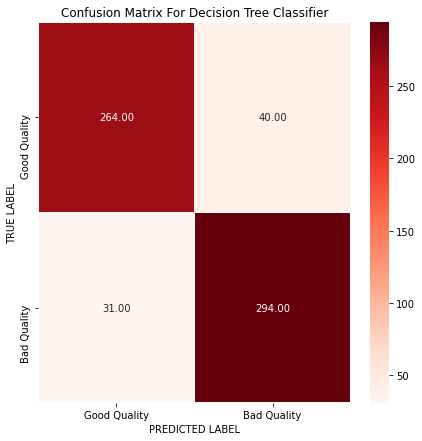

In [87]:
cm = confusion_matrix(y_test,dt_pred)

x_axis_labels=['Good Quality','Bad Quality']
y_axis_labels=['Good Quality','Bad Quality']

ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.1,fmt='.2f',cmap='Reds',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix For Decision Tree Classifier')

plt.show()

In [88]:
#ROC_AUC Score of Decision Tree Classifier:
roc_auc_score(y_test,dt.predict(x_test))

0.8865182186234819

##### 2. Random Forest Classifier :

In [89]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_train)
rf_clf_report = pd.DataFrame(classification_report(y_train,rf_pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,rf_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{rf_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,rf_pred)}\n")


=======================Train Result===========================
Accuracy score:100.00%
_______________________________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    953.0  932.0       1.0     1885.0        1885.0
________________________________________________________________
 Confusion Matrix:
[[953   0]
 [  0 932]]



In [114]:
rf_pred=rf.predict(x_test)
rf_clf_report = pd.DataFrame(classification_report(y_test,rf_pred,output_dict=True))
print("\n=======================Test Result of RF_clf===========================")
print(f"Accuracy score:{accuracy_score(y_test,rf_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{rf_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,rf_pred)}\n")      
      


=======================Test Result of RF_clf===========================
Accuracy score:93.16%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.957895    0.909884  0.931638    0.933889      0.933088
recall       0.898026    0.963077  0.931638    0.930552      0.931638
f1-score     0.926995    0.935725  0.931638    0.931360      0.931506
support    304.000000  325.000000  0.931638  629.000000    629.000000
________________________________________________________________
 Confusion Matrix:
[[273  31]
 [ 12 313]]



Text(0.5, 1.0, 'Confusion Matrix For Random Forest Classifier')

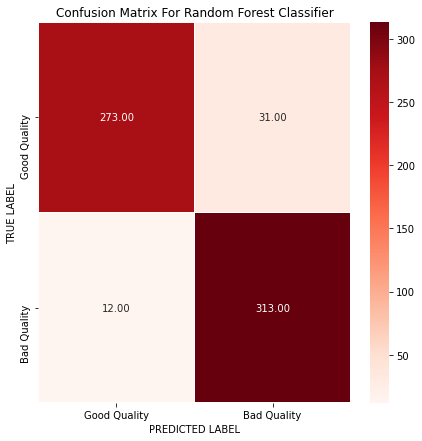

In [91]:
cm = confusion_matrix(y_test,rf_pred)

x_axis_labels=['Good Quality','Bad Quality']
y_axis_labels=['Good Quality','Bad Quality']

ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.1,fmt='.2f',cmap='Reds',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix For Random Forest Classifier')

In [92]:
#ROC_AOC Score of Random Forest Classifier:
roc_auc_score(y_test,rf.predict(x_test))

0.9305516194331983

##### 3. K-Neighbors Classifier :

In [93]:
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
kn_pred = kn.predict(x_train)
kn_clf_report = pd.DataFrame(classification_report(y_train,kn_pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,kn_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{kn_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,kn_pred)}\n")


=======================Train Result===========================
Accuracy score:92.68%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.986858    0.878817   0.92679     0.932837      0.933439
recall       0.866737    0.988197   0.92679     0.927467      0.926790
f1-score     0.922905    0.930303   0.92679     0.926604      0.926563
support    953.000000  932.000000   0.92679  1885.000000   1885.000000
________________________________________________________________
 Confusion Matrix:
[[826 127]
 [ 11 921]]



In [94]:
kn_pred=kn.predict(x_test)
kn_clf_report = pd.DataFrame(classification_report(y_test,kn_pred,output_dict=True))
print("\n=======================Test Result of KNN_clf===========================")
print(f"Accuracy score:{accuracy_score(y_test,kn_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{kn_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,kn_pred)}\n")      
      


=======================Test Result of KNN_clf===========================
Accuracy score:88.39%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.967611    0.829843  0.883943    0.898727      0.896427
recall       0.786184    0.975385  0.883943    0.880784      0.883943
f1-score     0.867514    0.896747  0.883943    0.882130      0.882618
support    304.000000  325.000000  0.883943  629.000000    629.000000
________________________________________________________________
 Confusion Matrix:
[[239  65]
 [  8 317]]



Text(0.5, 1.0, 'Confusion Matrix For K-Nearest Neighbor Classifier')

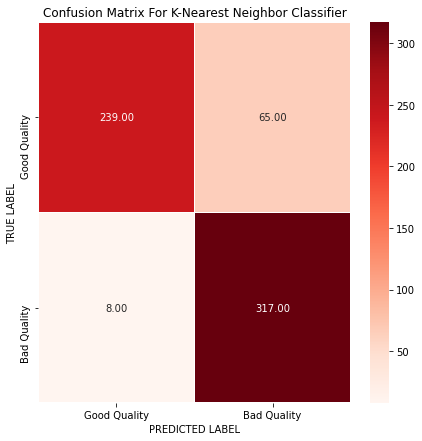

In [95]:
cm = confusion_matrix(y_test,kn_pred)

x_axis_labels=['Good Quality','Bad Quality']
y_axis_labels=['Good Quality','Bad Quality']

ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.1,fmt='.2f',cmap='Reds',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix For K-Nearest Neighbor Classifier')

In [96]:
#ROC_AUC Score of K-Nearest Kneibors Classifier:
roc_auc_score(y_test,kn.predict(x_test))

0.8807844129554656

##### 4. Support Vector Classifier:

In [97]:
svc = SVC()
svc.fit(x_train,y_train)
svc_pred = svc.predict(x_train)
svc_clf_report = pd.DataFrame(classification_report(y_train,svc_pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,svc_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{svc_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,svc_pred)}\n")
      


=======================Train Result===========================
Accuracy score:92.15%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.942794    0.901639  0.921485     0.922217      0.922446
recall       0.899265    0.944206  0.921485     0.921736      0.921485
f1-score     0.920516    0.922432  0.921485     0.921474      0.921463
support    953.000000  932.000000  0.921485  1885.000000   1885.000000
________________________________________________________________
 Confusion Matrix:
[[857  96]
 [ 52 880]]



In [98]:
svc_pred=svc.predict(x_test)
svc_report = pd.DataFrame(classification_report(y_test,svc_pred,output_dict=True))
print("\n=======================Test Result of SVC===========================")
print(f"Accuracy score:{accuracy_score(y_test,svc_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{svc_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,svc_pred)}\n")      
      


=======================Test Result of SVC===========================
Accuracy score:88.39%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.899654    0.870588  0.883943    0.885121      0.884636
recall       0.855263    0.910769  0.883943    0.883016      0.883943
f1-score     0.876897    0.890226  0.883943    0.883561      0.883784
support    304.000000  325.000000  0.883943  629.000000    629.000000
________________________________________________________________
 Confusion Matrix:
[[260  44]
 [ 29 296]]



Text(0.5, 1.0, 'Confusion Matrix Of SVC')

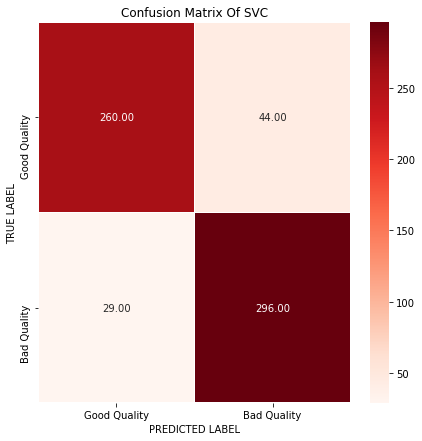

In [99]:
cm = confusion_matrix(y_test,svc_pred)

x_axis_labels=['Good Quality','Bad Quality']
y_axis_labels=['Good Quality','Bad Quality']

ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.1,fmt='.2f',cmap='Reds',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix Of SVC')

In [100]:
#ROC_AUC Score of SVC:
roc_auc_score(y_test,svc.predict(x_test))

0.8830161943319839

##### 5. Gradient Boosting Classifier:

In [101]:
gbdt_clf = GradientBoostingClassifier()
gbdt_clf.fit(x_train,y_train)
pred=gbdt_clf.predict(x_train)
gbdt_clf_report = pd.DataFrame(classification_report(y_train,pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{gbdt_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,pred)}\n")


=======================Train Result===========================
Accuracy score:95.07%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.978842    0.925025  0.950663     0.951934      0.952233
recall       0.922350    0.979614  0.950663     0.950982      0.950663
f1-score     0.949757    0.951537  0.950663     0.950647      0.950637
support    953.000000  932.000000  0.950663  1885.000000   1885.000000
________________________________________________________________
 Confusion Matrix:
[[879  74]
 [ 19 913]]



In [116]:
pred=gbdt_clf.predict(x_test)
clf_report = pd.DataFrame(classification_report(y_test,pred,output_dict=True))
print("\n=======================Test Result of GB_Clf===========================")
print(f"Accuracy score:{accuracy_score(y_test,pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,pred)}\n")


=======================Test Result of GB_Clf===========================
Accuracy score:88.87%
_______________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.911972    0.869565  0.888712    0.890769      0.890061
recall       0.851974    0.923077  0.888712    0.887525      0.888712
f1-score     0.880952    0.895522  0.888712    0.888237      0.888481
support    304.000000  325.000000  0.888712  629.000000    629.000000
________________________________________________________________
 Confusion Matrix:
[[259  45]
 [ 25 300]]



Text(0.5, 1.0, 'Confusion Matrix Of Gradient Boosting Classifier')

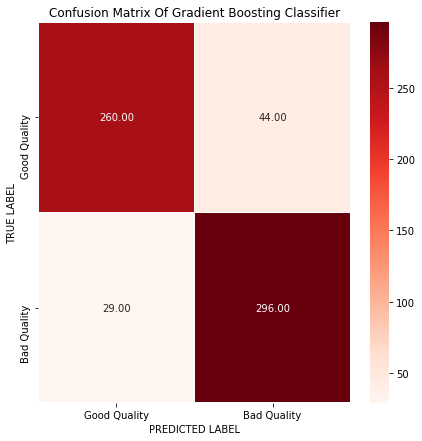

In [103]:
cm = confusion_matrix(y_test,svc_pred)

x_axis_labels=['Good Quality','Bad Quality']
y_axis_labels=['Good Quality','Bad Quality']

ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.1,fmt='.2f',cmap='Reds',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix Of Gradient Boosting Classifier')

In [104]:
#ROC_AUC Score of Gradient Boosting Classifier:
roc_auc_score(y_test,svc.predict(x_test))

0.8830161943319839

The accuracy score of 5 different models are below,
1.    Decision Tree Classifier:88.71%
2.    Random Forest Classifier:93.16%
3.    K-Neighbors Classifier: 88.39%
4.    Support Vector Classifier: 88.39%
5.    Gradient Boosting Classifier: 88.87%
 
 So, Random Forest Classifier is giving the best accuracy.
 
 
 Now let's plot the ROC_AUC Curve:

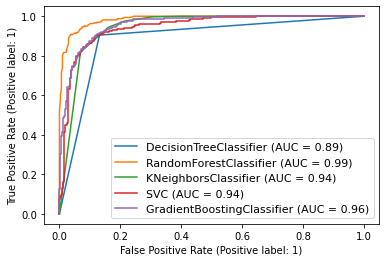

In [105]:
# Let's check ROC_AUC curve for fitted models:

disp = plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gbdt_clf,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

As we can see Random forest is giving the best result(the orange line).

##### Cross validation :

Cross validation is widely used technique to evaluate the performance of Machine Learning Models. Cross Validation divides the data into parts, where one set is used for traning and other is used for testing purpose. And by applying CV, we can understand if our model is overfitting on training data or not.


In [106]:
###Checking Cross Validation score of Decision Tree Classifier:
print(f"CV Score of DT:{cross_val_score(dt,x,y,cv=5).mean()*100:.2f}%")

CV Score of DT:86.12%


In [113]:
#Checking Cross Validation
print(f"CV Score of RF:{cross_val_score(rf,x,y,cv=5).mean()*100:.2f}%")

CV Score of RF:91.01%


In [108]:
# Checking Cross Validation Score of KNN:
print(f"CV Score of KNN:{cross_val_score(kn,x,y,cv=5).mean()*100:.2f}%")

CV Score of KNN:85.32%


In [109]:
#Checking Cross Validation Score of SVC:
print(f"CV Score of SVC:{cross_val_score(svc,x,y,cv=5).mean()*100:.2f}%")

CV Score of SVC:71.56%


In [115]:
#Checking Cross Validation Score of SVC:
print(f"CV Score of Gradient Boosting Classifier:{cross_val_score(gbdt_clf,x,y,cv=5).mean()*100:.2f}%")

CV Score of Gradient Boosting Classifier:87.95%


Now let's check the difference between Accuracy Score and Cross Validation Score to select the best model out of 5 models:

Diffrence betwwwn Accuracy score and Cross Validation Score of 5 different models :

1. DT = 88.71-86.12= 2.59 ,
2. Rf = 93.16-91.01 = 2.15,
3. KNN = 88.39-85.32 = 3.07, 
4. SVC = 88.39-71.56 = 16.83,
5. GB_Clf = 88.87-87.95 = 0.92

So,we can see the difference of Accuracy Score and CV of Gradient boosting classifier is the least but Accuracy Score of Random Forest Classifier is best(almost 94%).


Let's do Hyperparameter Tuning of Random Forest Classifier.


##### Hyperparameter Tuning:

In [118]:
rf = RandomForestClassifier()
params={'n_estimators':[13,15],
       'criterion':['entropy','gini'],
       'max_depth':[10,15],
       'min_samples_split':[10,11],
       'min_samples_leaf':[5,6]}

grd= GridSearchCV(rf,param_grid=params)
grd.fit(x_train,y_train)
print('best_params=> ',grd.best_params_)

rfc=grd.best_estimator_ #reinstantiating with best params
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)

rfc_conf_mat = confusion_matrix(y_test,y_pred)
print('con_mat=> ','\n',rf_conf_mat)
print('Accuracy of rf After Hyperparameter Tuning==> ',accuracy_score(y_test,y_pred)*100)

best_params=>  {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 11, 'n_estimators': 13}
con_mat=>  
 [[258  46]
 [ 23 302]]
Accuracy of rf After Hyperparameter Tuning==>  89.34817170111288


In [119]:
Report = classification_report(y_test,y_pred)
print(Report)

              precision    recall  f1-score   support

           0       0.93      0.85      0.88       304
           1       0.87      0.94      0.90       325

    accuracy                           0.89       629
   macro avg       0.90      0.89      0.89       629
weighted avg       0.90      0.89      0.89       629



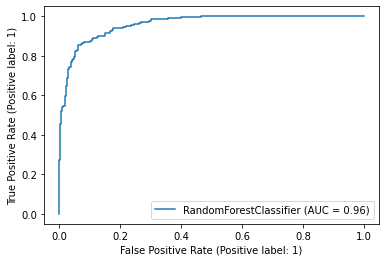

In [117]:
disp = plot_roc_curve(rfc,x_test,y_test)

So, after hyperparameter tuning the Accuracy Score of Random Forest Classifier is 89% Where as Cross Validation Score is less (91%) And the Accuracy Score without parameter tuning is 93%. So we can say that after parameter tuning Random Forest Classifier is giving the less accuracy(89%),but without parameter tuning it's giving best result(93%).

In [171]:
# model prediction using RF
x_predict = list(rf.predict(x_test))
rf_redWine = {'predicted_values':x_predict,'orignal_values':y_test}
print(pd.DataFrame(rf_redWine))

      predicted_values  orignal_values
973                  0               0
679                  0               0
1176                 0               0
252                  0               0
1085                 0               0
...                ...             ...
1525                 0               0
1336                 0               0
367                  0               0
498                  0               1
1413                 0               0

[365 rows x 2 columns]


In [172]:
#import joblib
import joblib

joblib.dump(rf,'rf_redWine_file.obj')

# SAVING THE MODEL

['rf_redWine_file.obj']

In [173]:
rf_from_joblib=joblib.load('rf_redWine_file.obj')
rf_from_joblib.predict(x_test)

#TESTING THE SAVED MODEL

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

#### Conclusion:

This Red wine quality dataset is a very interesting dataset overall as it contains 6 different categories of wine. At the beginning we thought it's okay to have multiclass but then we realized that it's not possible for us to make any confusion matrix out of it with this variation in target variable. Moreover, the given problem statement has also stated that it will be helpful to make the 6 categories into only 2 categories(Binary classes : 0, 1). We have done that and it made the work easier for us to predict the wine quality.
We have made 5 different models to predict the target, out of which Random Forest Classifier has done tremendous job by giving result of 93% Accuracy.